# Task-1 Prediction using Supervised ML

## Author: Khalid Tariq 



### Problem:
* Predict the percentage of a student based on the no. of study hours
* What will be the predicted score if a student studies for 9.25 hrs/day?

## Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Reading Data


In [3]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Plotting Distribution of Data
 

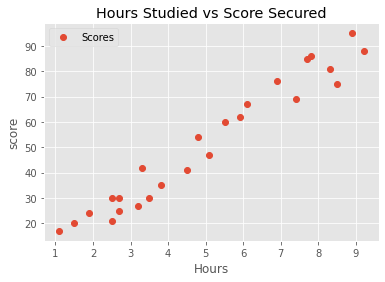

In [39]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Studied vs Score Secured')  
plt.xlabel('Hours')  
plt.ylabel('score')  
plt.show()

## we can see that there is a linear relation between hours studied and percentage secured.

## LINEAR REGRESSION

In [18]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Preparing the data

In [26]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Spliting dataset into training set and testing set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (25, 1)
y: (25,)


## Plotting distribution of training and testing dataset 

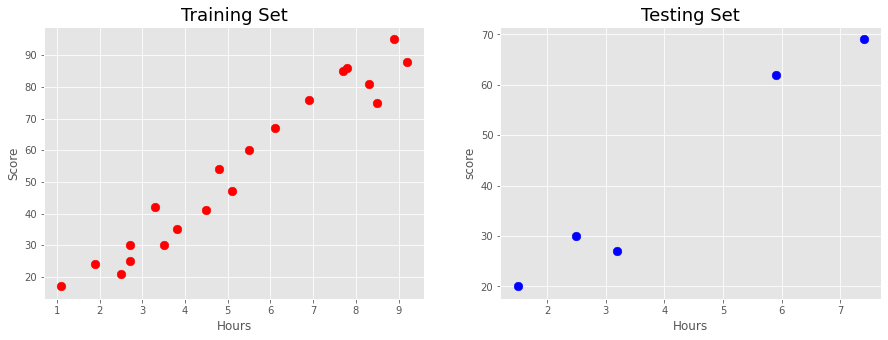

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('Training Set', fontsize=18)
ax[0].scatter(X_train, y_train, s=75, color='red')
ax[0].set_xlabel('Hours')
ax[0].set_ylabel('Score')
ax[1].set_title('Testing Set', fontsize=18)
ax[1].scatter(X_test, y_test, s=75, color='blue')
ax[1].set_xlabel('Hours')
ax[1].set_ylabel('score')
plt.show()

## Training the Algorithm

In [36]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


## Plotting Regression Line


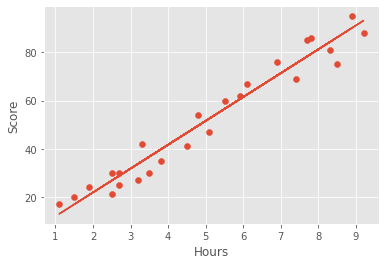

In [40]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.plot(X, line);
plt.show()

## Making Predictions


In [48]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual score': y_test, 'Predicted score': y_pred})  
df 

,Actual score,Predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluation

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


##  Predicted score if a student studies for 9.25 hrs/ day

In [47]:
hours = 9.25
score = regressor.predict([[hours]])
pd.DataFrame({'Hours': hours, 'Predicted Score': score})

,Hours,Predicted Score
0,9.25,93.691732


## If a student studies for 9.25 hrs/day, the Score will be 93% as per the trained model.